Number of duplicate rows is: 1081


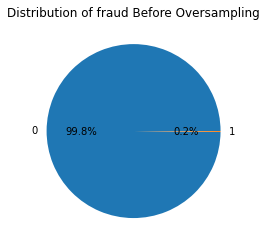

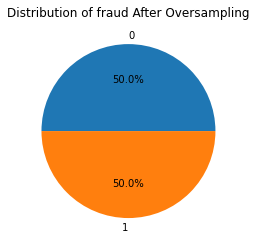

Number of samples for each class after oversampling:
 0    283253
1    283253
Name: Class, dtype: int64


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\Msys\Desktop\New folder\creditcard.csv')

# Check for duplicates and remove them
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows is:", num_duplicates)
df = df.drop_duplicates()

# Select the 'Class' column
type_col = df['Class']

# Calculate the frequency of each value in the 'Class' column
freq = type_col.value_counts()

# Create a pie chart to visualize the distribution of fraud before oversampling
plt.pie(freq, labels=freq.index, autopct='%1.1f%%')
plt.title('Distribution of fraud Before Oversampling')
plt.show()

# Select the features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Create the SMOTE oversampler
oversampler = SMOTE()

# Oversample the data
X_over, y_over = oversampler.fit_resample(X, y)

# Calculate the frequency of each value in the target column after oversampling
freq_over = y_over.value_counts()

# Create a pie chart to visualize the distribution of fraud after oversampling
plt.pie(freq_over, labels=freq_over.index, autopct='%1.1f%%')
plt.title('Distribution of fraud After Oversampling')
plt.show()
print("Number of samples for each class after oversampling:\n", freq_over)


Number of samples used for training (Logistic Regression): 453204
Number of samples used for testing (Logistic Regression): 113302
Accuracy: Logistic Regression 0.9793825351714885


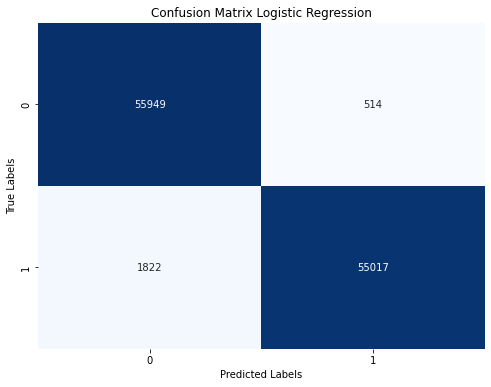

Classification report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     56463
           1       0.99      0.97      0.98     56839

    accuracy                           0.98    113302
   macro avg       0.98      0.98      0.98    113302
weighted avg       0.98      0.98      0.98    113302



In [5]:


#1. LR

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
print("Number of samples used for training (Logistic Regression):", X_train_lr.shape[0])
print("Number of samples used for testing (Logistic Regression):", X_test_lr.shape[0])

# Scale the input data
scaler = StandardScaler()
X_train_scaled_lr = scaler.fit_transform(X_train_lr)
X_test_scaled_lr = scaler.transform(X_test_lr)

# Create the Logistic Regression classifier
lr_clf = LogisticRegression(max_iter=1000)

# Fit the classifier to the training data
lr_clf.fit(X_train_scaled_lr, y_train_lr)

# Predict on the test data
y_pred_lr = lr_clf.predict(X_test_scaled_lr)

# Calculate the accuracy for Logistic Regression
accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)
print("Accuracy: Logistic Regression", accuracy_lr)

# Generate the confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test_lr, y_pred_lr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 18})
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the classification report for Logistic Regression
print("Classification report (Logistic Regression):\n", classification_report(y_test_lr, y_pred_lr))


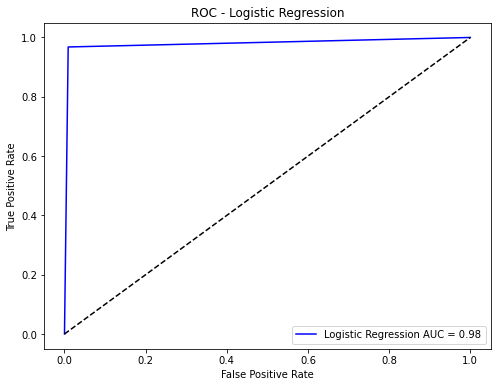

In [6]:
from sklearn.metrics import roc_curve, auc

# Compute the ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_lr, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot the ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label='Logistic Regression AUC = %0.2f' % roc_auc_lr)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


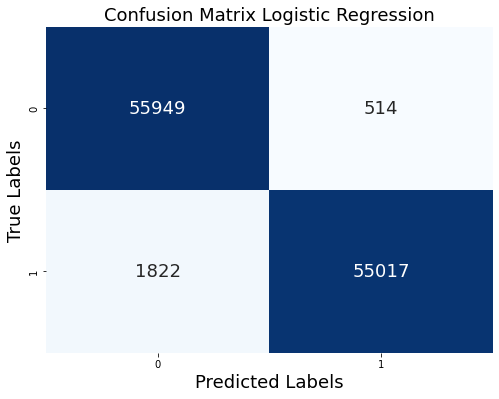

In [30]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 18})
plt.title('Confusion Matrix Logistic Regression', fontsize=18)
plt.xlabel('Predicted Labels',fontsize=18)
plt.ylabel('True Labels',fontsize=18)
plt.show()



Number of samples used for training (Naive Bayes): 453204
Number of samples used for testing (Naive Bayes): 113302
Accuracy: Naive Bayes 0.9235406259377592


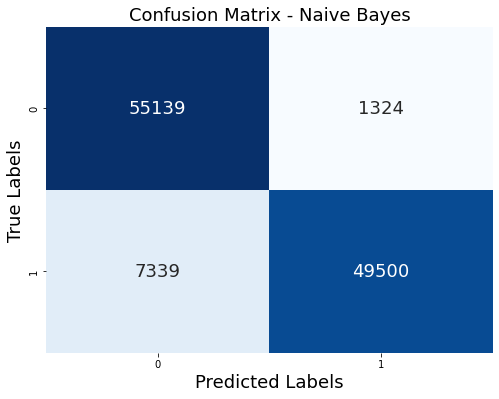

Classification report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     56463
           1       0.97      0.87      0.92     56839

    accuracy                           0.92    113302
   macro avg       0.93      0.92      0.92    113302
weighted avg       0.93      0.92      0.92    113302



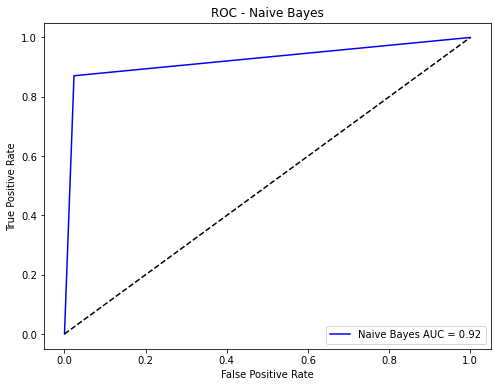

In [31]:
# 2. NB

from sklearn.naive_bayes import GaussianNB

# Split the data into training and testing sets
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
print("Number of samples used for training (Naive Bayes):", X_train_nb.shape[0])
print("Number of samples used for testing (Naive Bayes):", X_test_nb.shape[0])

# Scale the input data
scaler = StandardScaler()
X_train_scaled_nb = scaler.fit_transform(X_train_nb)
X_test_scaled_nb = scaler.transform(X_test_nb)

# Create the Gaussian Naive Bayes classifier
nb_clf = GaussianNB()

# Fit the classifier to the training data
nb_clf.fit(X_train_scaled_nb, y_train_nb)

# Predict on the test data
y_pred_nb = nb_clf.predict(X_test_scaled_nb)

# Calculate the accuracy for Naive Bayes
accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)
print("Accuracy: Naive Bayes", accuracy_nb)

# Generate the confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test_nb, y_pred_nb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 18})
plt.title('Confusion Matrix - Naive Bayes',fontsize=18)
plt.xlabel('Predicted Labels',fontsize=18)
plt.ylabel('True Labels',fontsize=18)
plt.show()

# Print the classification report for Naive Bayes
print("Classification report (Naive Bayes):\n", classification_report(y_test_nb, y_pred_nb))

# Compute the ROC curve and AUC for Naive Bayes
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_nb, y_pred_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot the ROC curve for Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', label='Naive Bayes AUC = %0.2f' % roc_auc_nb)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Naive Bayes')
plt.legend(loc="lower right")
plt.show()


Number of samples used for training (Decision Tree): 453204
Number of samples used for testing (Decision Tree): 113302
Accuracy Decision Tree Classifier:  0.9788176731213923


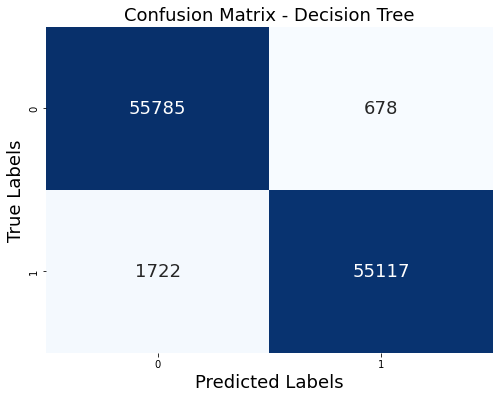

Classification report (Decision Tree):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     56463
           1       0.99      0.97      0.98     56839

    accuracy                           0.98    113302
   macro avg       0.98      0.98      0.98    113302
weighted avg       0.98      0.98      0.98    113302



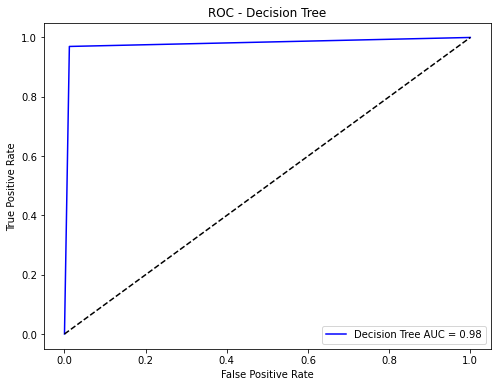

In [32]:
# 3. DT

from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
print("Number of samples used for training (Decision Tree):", X_train_dt.shape[0])
print("Number of samples used for testing (Decision Tree):", X_test_dt.shape[0])

# Create the Decision Tree classifier with limited depth
dt_clf = DecisionTreeClassifier(max_depth=7)

# Fit the classifier to the training data
dt_clf.fit(X_train_dt, y_train_dt)

# Predict on the test data
y_pred_dt = dt_clf.predict(X_test_dt)

# Calculate the accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print("Accuracy Decision Tree Classifier: ", accuracy_dt)

# Generate the confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test_dt, y_pred_dt)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,annot_kws={"size": 18})
plt.title('Confusion Matrix - Decision Tree',fontsize=18)
plt.xlabel('Predicted Labels',fontsize=18)
plt.ylabel('True Labels',fontsize=18)
plt.show()

# Print the classification report for Decision Tree
print("Classification report (Decision Tree):\n", classification_report(y_test_dt, y_pred_dt))

# Compute the ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_dt, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot the ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', label='Decision Tree AUC = %0.2f' % roc_auc_dt)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Decision Tree')
plt.legend(loc="lower right")
plt.show()


Number of samples used for training (Random Forest): 453204
Number of samples used for testing (Random Forest): 113302
Accuracy Random Forest Classifier:  0.9671762193076909


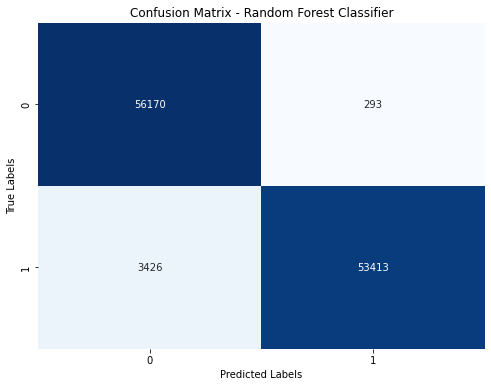

Classification report (Random Forest):
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     56463
           1       0.99      0.94      0.97     56839

    accuracy                           0.97    113302
   macro avg       0.97      0.97      0.97    113302
weighted avg       0.97      0.97      0.97    113302



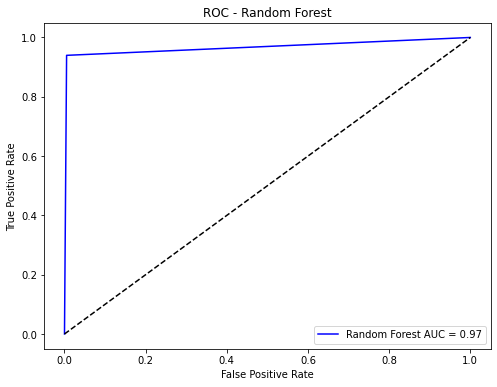

In [16]:
# 4. RF

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets (assuming X_over and y_over are already defined)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
print("Number of samples used for training (Random Forest):", X_train_rf.shape[0])
print("Number of samples used for testing (Random Forest):", X_test_rf.shape[0])

# Scale the input data
scaler = StandardScaler()
X_train_scaled_rf = scaler.fit_transform(X_train_rf)
X_test_scaled_rf = scaler.transform(X_test_rf)

# Create the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=5)  # You can adjust the hyperparameters as needed

# Fit the classifier to the training data
rf_clf.fit(X_train_scaled_rf, y_train_rf)

# Predict on the test data
y_pred_rf = rf_clf.predict(X_test_scaled_rf)

# Calculate the accuracy for Random Forest
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
print("Accuracy Random Forest Classifier: ", accuracy_rf)

# Generate the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 18})
plt.title('Confusion Matrix - Random Forest Classifier',fontsize=18)
plt.xlabel('Predicted Labels',fontsize=18)
plt.ylabel('True Labels',fontsize=18)
plt.show()

# Print the classification report for Random Forest
print("Classification report (Random Forest):\n", classification_report(y_test_rf, y_pred_rf))

# Compute the ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_rf, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label='Random Forest AUC = %0.2f' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()


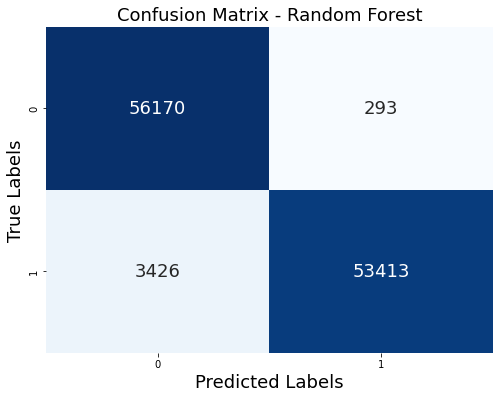

In [34]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 18})
plt.title('Confusion Matrix - Random Forest',fontsize=18)
plt.xlabel('Predicted Labels',fontsize=18)
plt.ylabel('True Labels',fontsize=18)
plt.show()


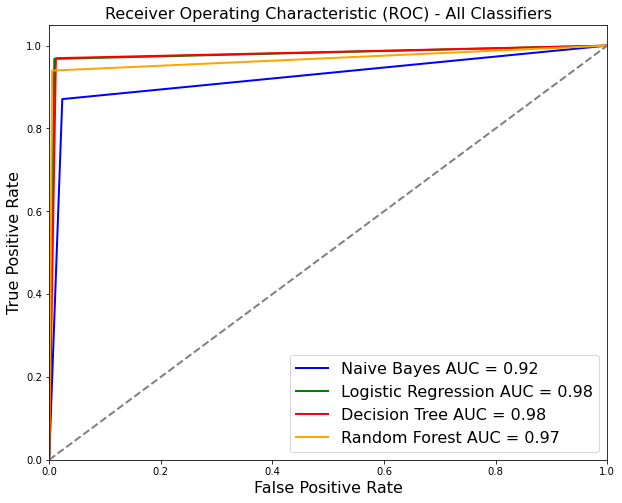

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the ROC curves and AUC for each classifier
fpr_nb, tpr_nb, _ = roc_curve(y_test_nb, y_pred_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_lr, tpr_lr, _ = roc_curve(y_test_lr, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_dt, tpr_dt, _ = roc_curve(y_test_dt, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Create a single ROC curve plot
plt.figure(figsize=(10, 8))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'Naive Bayes AUC = {roc_auc_nb:.2f}')
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label=f'Logistic Regression AUC = {roc_auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'Decision Tree AUC = {roc_auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label=f'Random Forest AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic (ROC) - All Classifiers', fontsize=16)
legend = plt.legend(loc='lower right', fontsize=16)
plt.show()
